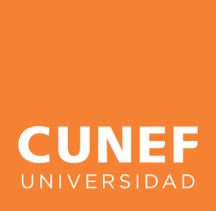

Realizado por:

***Sergio Ranz Casado***  
***Marcos Medina Cogolludo***

---


# 1.1. ANALISIS EDA ACCIDENTES DE TRÁFICO. 

Para nuestro análisis exploratorio inicial, queremos abordar las primeras preguntas en cuanto a los datos. 

**Análisis de accidentes/muertes por acciente.** Queremos enfocar nuestro análisis a los accidentes de trafico y muertes sobre las diferentes variables de nuestro data frame. Respondemos a las siguientes cuestiones: 

1. *Evolución accidentes y muertos a lo largo de los periodos.* 

2. *Análisis de la correlacción de las muertes con los accidentes.*

3. *¿En que carreteras es mas probable tener accidentes? ¿En que tipo de carretera es mas probable fallecer?*

4. *¿Qué dias a la semana suelen tener accidentes? ¿Que dia de la semana hay mas fallecidos?*  

5. *¿Con qué tipos de clima es mas probable tener accidentes? ¿En que superficie es mas probable tener accidentes? Correlacción clima con superficie, análisis tipo de clima y tipo de calzada vs mortalidad.* 

6. *¿Que tipos de vehiculos son mas propensos a tener accidentes mortales? Año del vehiculo.*

7. *¿Qué tipos de conductores son mas propensos a tener accidentes mortales? Sexo, edad, tipo de conductor.* 

8. *¿Qué posición dentro del habitaculo del vehiculo es mas mortal?.* 

9. *Tipo de colisión y mortalidad.* 

10. *Uso mecanismos de seguridad vs mortalidad.*  

---

#### IMPORTACIÓN DE LIBRERIAS

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import pyarrow.csv as pv
import pyarrow.parquet as pq
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

#### DEFINIMOS FUNCIONES:

In [3]:
def plot_analisis (data, title, rot): 
    '''Dibujamos el grafico para mostrar la relacción de accidentes con tipo de carretera'''

    fig,ax1 = plt.subplots()
    ax1.tick_params(grid_alpha=0)
    ax2 = ax1.twinx()
    ax2.tick_params(grid_alpha=0)
    ax2.set_ylabel('Percentaje de mortalidad', color="red")

    data.plot(kind="bar",rot=rot, log=True,color=['orange','navy'],figsize=(15,6),title=title, ax=ax1)

    '''Dubujamos la Linea de mortalidad:''' 

    linea_mortalidad = data["Muertos"]/(data["Muertos"] + data["No Muertos"])*100
    linea_mortalidad.plot(c="red", style="o--", ax=ax2)


#### LECTURA DATASET

In [4]:
df_acc = pd.read_parquet('../data/NCDB_1999_to_2014.parquet')
df_acc.columns = df_acc.columns.map(lambda x: x[:].lower())
df_acc

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
0,1999,01,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,01,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,01,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,01,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,01,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,UU,U,UU,2,UU,UU,01,U,U,...,13,07,UUUU,01,M,24,11,1,NN,1
5860401,2014,UU,U,23,2,01,06,05,1,1,...,01,14,2006,01,M,29,96,2,09,5
5860402,2014,UU,U,14,2,01,02,01,1,5,...,01,01,2006,01,F,UU,11,2,01,1
5860403,2014,UU,U,22,1,01,06,01,2,4,...,01,22,UUUU,01,M,67,12,3,01,U


#### PEQUEÑO TRATAMIENTO DE DATOS PARA ANALIZAR...

Como ya hemos visto en nuestro análisis, tanto el mes como el dia de la semana tienen muy pocos valores NA. Por lo que hemos decidido eliminarlos. Para nuestro analisis exploratorio inicial.

In [5]:
df_acc_p = df_acc[:]
df_acc_p[['c_mnth','c_wday']] = df_acc_p[['c_mnth','c_wday']].replace('[^0-9]+',np.nan,regex=True)
df_acc_p.dropna(axis=0,subset=['c_mnth','c_wday'],inplace=True)

df_acc_p

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
0,1999,01,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,01,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,01,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,01,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,01,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860376,2014,12,7,14,2,02,41,01,1,5,...,02,05,2008,01,M,44,11,1,02,1
5860377,2014,12,7,14,2,02,41,01,1,5,...,02,05,2008,02,M,34,13,2,02,2
5860378,2014,12,7,19,2,01,03,01,1,3,...,01,01,2001,01,F,35,11,2,02,1
5860379,2014,12,7,19,2,01,03,01,1,3,...,01,01,2001,02,M,26,13,1,02,2


In [6]:
df_acc_p["mortal"] = np.where(df_acc_p["c_sev"]==1,1,0)
df_acc_p["no mortal"] = np.where(df_acc_p["c_sev"]==2,1,0)
df_acc_p["Fecha"] = pd.to_datetime(df_acc_p['c_year'].map(str) + '-' + df_acc_p['c_mnth'], format='%Y-%m')


In [7]:
df_acc_p[["Fecha", "mortal","no mortal"]]

,Fecha,mortal,no mortal
0,1999-01-01,0,1
1,1999-01-01,0,1
2,1999-01-01,0,1
3,1999-01-01,0,1
4,1999-01-01,0,1
...,...,...,...
5860376,2014-12-01,0,1
5860377,2014-12-01,0,1
5860378,2014-12-01,0,1
5860379,2014-12-01,0,1


#### 1. EVOLUCIÓN DE ACCIDENTES EN EL TIEMPO

#### 1.1. EVOLUCIÓN ACCIDENTES AÑOS. 

In [8]:
data_1 = df_acc_p.groupby(["Fecha"])[["mortal","no mortal"]].sum()
data_1

,mortal,no mortal
Fecha,,
1999-01-01,433,33043
1999-02-01,482,26004
1999-03-01,616,28783
1999-04-01,437,27937
1999-05-01,637,34803
...,...,...
2014-08-01,517,26636
2014-09-01,406,25988
2014-10-01,438,27032


<AxesSubplot:xlabel='Fecha'>

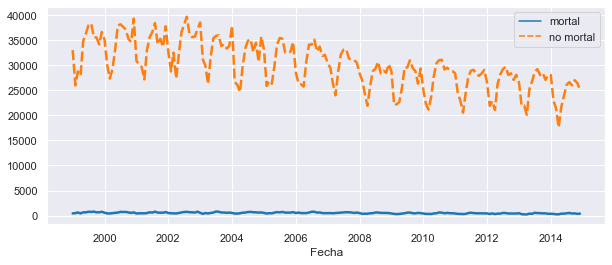

In [9]:
sns.set(rc={'figure.figsize':(10, 4)})
sns.set_theme(style="darkgrid")
sns.lineplot(data=data_1, palette="tab10", linewidth=2.5)

Vamos a ver la evolución de los accidentes en el período comprendido entre 1999 y 2014. La tendencia tal y como dice el informe de accidentes de Canadá es decreciente. Si que observamos una fuerte estacionalidad entre los periodos de la serie. 

Hay una gran discrepancia entre las dos series. Lo veremos en el análisis de la variable objeto. `C_sev`.Ploteamos la evolución de cada serie por separado. 

#### 1.1.1  ACCIDENTES ANUALES

<AxesSubplot:xlabel='Fecha', ylabel='no mortal'>

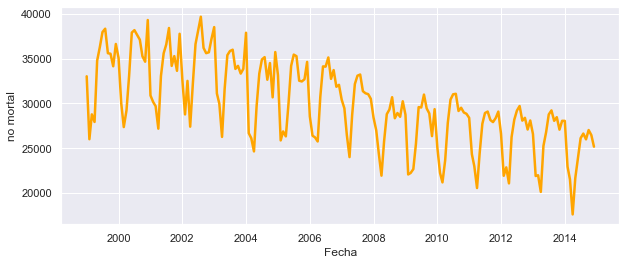

In [10]:
sns.set(rc={'figure.figsize':(10, 4)})
sns.set_theme(style="darkgrid")
sns.lineplot(data=data_1["no mortal"], palette="tab10", linewidth=2.5, color="orange")

Vemos como hay una cierta estacionalidad en los datos, que se repite cada año un comportamiento parecido, mantenioéndose constante con una tendencia bajista. Analizaremos en detalle ver en qué meses se produce.

#### 1.1.2 MORTALIDAD ANUAL

<AxesSubplot:xlabel='Fecha', ylabel='mortal'>

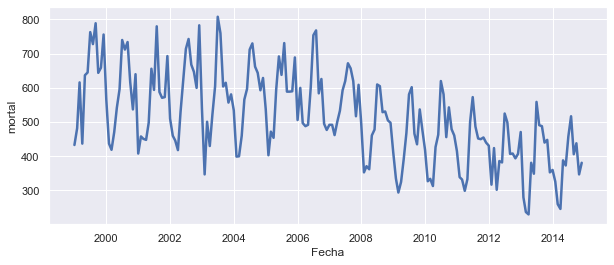

In [11]:
sns.set(rc={'figure.figsize':(10, 4)})
sns.set_theme(style="darkgrid")
sns.lineplot(data=data_1["mortal"], palette="tab10", linewidth=2.5)

La mortalidad esta muy correlaccionada con los accidentes, de manera logica vemos como tiene una tendencia decreciente con un comportamiento estacional. 

#### 2. CORRELACCIÓN ENTRE LOS ACCIDENTES MORTALES Y NO MORTALES

In [12]:
corr = data_1.corr()
corr

,mortal,no mortal
mortal,1.000000,0.864213
no mortal,0.864213,1.000000


Con los datos obtenidos vemos una alta correlación entre los accidentes mortales y no mortales. No en todos los accidentes mueren personas, y todas las personas que han muerto han sido por accidentes de tráfico.

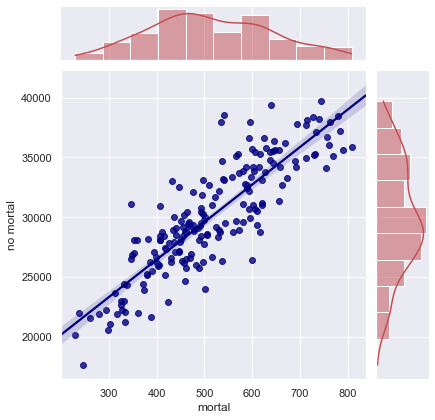

In [13]:
sns.jointplot(x="mortal", y="no mortal", data=data_1, kind="reg", truncate=False, color="r", joint_kws={'color':'navy'})

Análizamos esta relación gráficamente para ver que efectivamente existe una correlación lineal. 

#### 3.0. ¿EN QUE CARRETERAS ES MAS PROPENSO TENER ACCIDENTES?

#### 3.1. ANÁLISIS TRAMOS DE LA CARRETERA

Creamos un nuevo data frame solo con las variables que vamos a utilizar, indicando con nombres para verlo más claro en vez de con números.

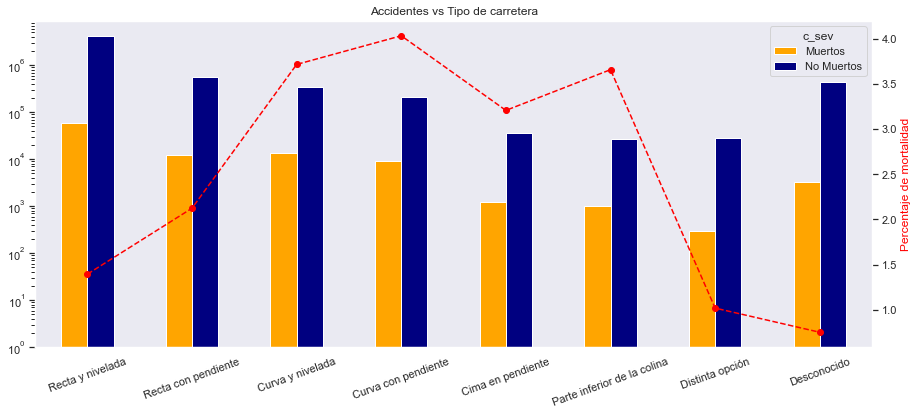

In [14]:
data_3 = df_acc_p[["c_raln", "c_sev"]].set_index("c_raln")
data_3 = data_3.groupby(["c_raln","c_sev"]).size().unstack()
data_3 = data_3.set_axis(["Recta y nivelada", "Recta con pendiente", "Curva y nivelada", "Curva con pendiente","Cima en pendiente", "Parte inferior de la colina", "Distinta opción", "Desconocido"], axis='index')
data_3 = data_3.rename(columns={1: 'Muertos', 2: 'No Muertos'})

'''Dibujamos el gráfico: '''

plot_analisis(data_3, "Accidentes vs Tipo de carretera", 20)

Observamos los datos de los accidentes en base al tipo de carretera en una escala logaritmica para hacer mas factible su comparabilidad ya que la disposición de los datos de nuestro dataset no es equitativa. Observamos como hay un mayor numero de accidentes en las carreteras rectas y niveladas. Deducimos que es por dos factores principales, el primero es que son las mas transitadas, y por ello, mas probabilidad de tener accidentes, lo segundo, es porque en carreteras largas los conductores tienden a distraerse mas. Sin embargo, el porcentaje de mortalidad cuando se tiene un accidente, es mucho mayor en curvas con pendiente y niveladas y en la partes inferiores de una pendiente. 

#### 4.0. ANALISIS ACCIDENTES DIAS DE LA SEMANA

<AxesSubplot:title={'center':'Accidentes vs Dia de la semana'}>

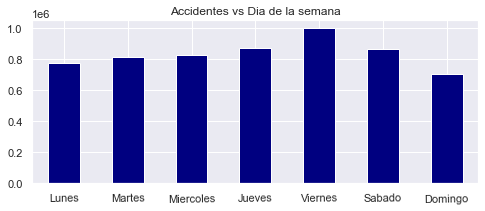

In [15]:
data_4 = df_acc_p[["c_wday", "c_sev"]].set_index("c_wday")
data_4 = data_4.groupby(["c_wday"])["c_sev"].count()
data_4 = data_4.set_axis(["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"], axis="index")
data_4.plot(kind="bar",rot=1,color= "navy", figsize=(8,3),
         title='Accidentes vs Dia de la semana')

En conclusion, no se muestran muchas diferencias entre los accidentes semanales, sin embargo, si tenemos un pico en el viernes. Seguiremos haciendo estudios mas adelante, sobre la edad y el dia de la semana que nos puedan otorgar algo mas de luz sobre nuestro dataset.  

#### 4.1. ANALISIS FALLECIDOS DIAS DE LA SEMANA

<AxesSubplot:title={'center':'Accidentes mortales vs Dia de la semana'}>

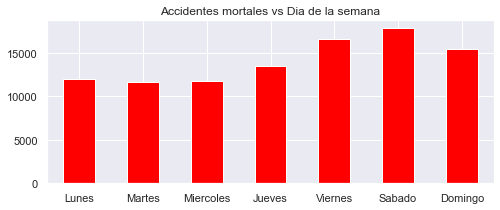

In [16]:
data_5 = df_acc_p[["c_wday", "mortal"]].set_index("c_wday")
data_5 = data_5.groupby(["c_wday"])["mortal"].sum()
data_5 = data_5.set_axis(["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"], axis="index")
data_5.plot(kind="bar",rot=0,color= "red", figsize=(8,3),
         title='Accidentes mortales vs Dia de la semana')

En la mortalidad si que se aprecia una diferencia visible entre los dias entresemana y los fin de semana, donde hay mucha mas mortalidad en los accidentes. Analizaremos mas adelante por que se debe esta situación, seguramente tenga que ver con el tipo de colision los fin de semana. 

#### 5.0. ¿En qué tipos de clima es mas propenso tener accidentes?

Creamos un nuevo data frame solo con las variables que vamos a utilizar, indicando con nombres para verlo más claro en vez de con números.

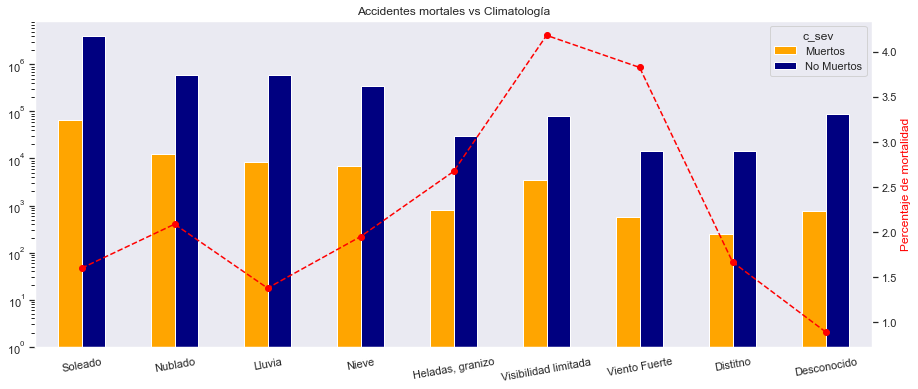

In [17]:
data_6 = df_acc_p[["c_wthr", "c_sev"]].set_index("c_wthr")
data_6 = data_6.groupby(["c_wthr", "c_sev"]).size().unstack()
data_6 = data_6.set_axis(["Soleado","Nublado","Lluvia","Nieve","Heladas, granizo","Visibilidad limitada","Viento Fuerte", "Distitno", "Desconocido"], axis="index")
data_6 = data_6.rename(columns={1: 'Muertos', 2: 'No Muertos'})

'''Dibujamos el gráfico: '''

plot_analisis(data_6, "Accidentes mortales vs Climatología", 10)

La climatologia nos puede arrojar mayor visibilidad sobre la mortalidad de un accidente o no. Aqui la diferencia no es tan grande en cuanto a la disposición del dataset, esto se debe en mayor medida al clima de Canadá. El mayor numero de accidente se tiene durante un dia soleado, sin embargo, la mortalidad de estos es bastante mas pequeña que en un dia con visibilidad reducida (niebla,etc), y con viento fuerte. 

Destacamos tambien que esta variable tiene muchos valores desconocidos y distintos, por lo que tendremos que decisión tomar con estos datos. 

#### 5.1. ¿En qué tipo de carretera es mas propenso tener accidentes?

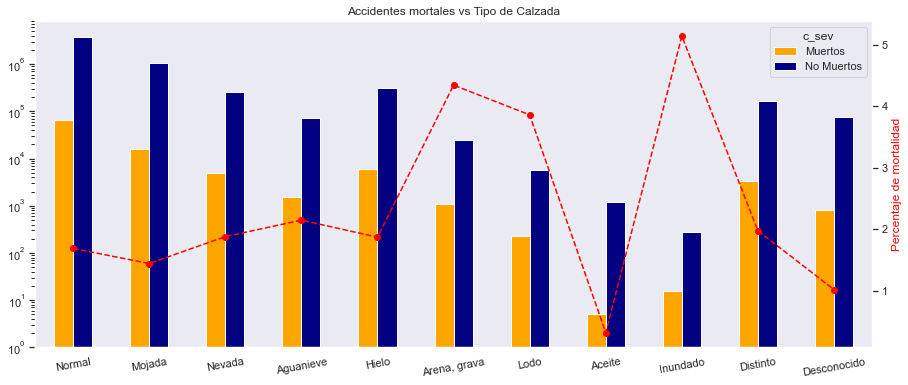

In [18]:
data_7 = df_acc_p[["c_rsur", "c_sev"]].set_index("c_rsur")
data_7 = data_7.groupby(["c_rsur", "c_sev"]).size().unstack()
data_7 = data_7.set_axis(["Normal","Mojada", "Nevada", "Aguanieve", "Hielo", "Arena, grava", "Lodo", 
                         "Aceite", "Inundado", "Distinto", "Desconocido"], axis="index")
data_7 = data_7.rename(columns={1: 'Muertos', 2: 'No Muertos'})

'''Dibujamos el grafico'''

plot_analisis(data_7, "Accidentes mortales vs Tipo de Calzada", 10)

Nos llama mucho la atención que la superficier con mayor mortalidad sea la inundada. Puede ser debido a posibles outliers. Tambien destacamos un aumento significativo de la mortalidad en superficies como Arena, graba y lodo. 

Volvemos a tener un porcentaje bastante elevado de superficies desconocidas. 

#### 6.0. ¿Que tipos de vehiculos son mas propensos a tener accidentes?

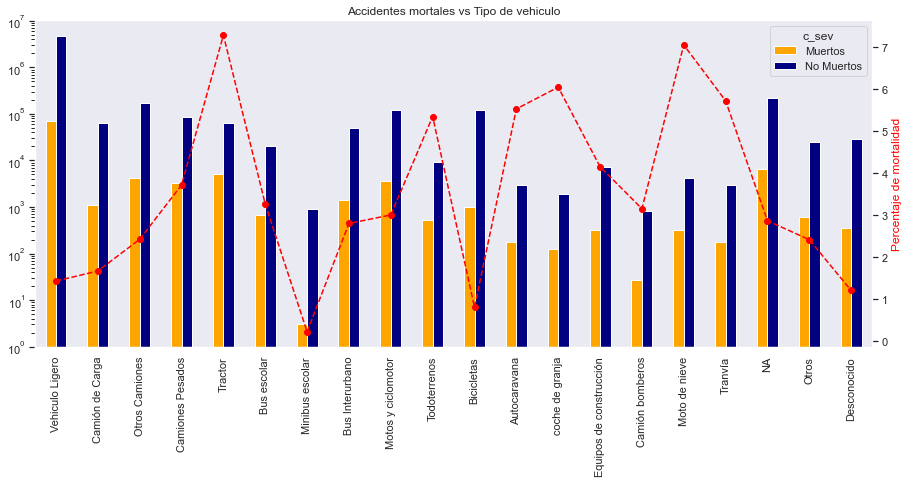

In [19]:
data_8 = df_acc_p[["v_type", "c_sev"]].set_index("v_type")
data_8 = data_8.groupby(["v_type", "c_sev"]).size().unstack()
data_8 = data_8.set_axis(["Vehiculo Ligero", "Camión de Carga", "Otros Camiones", "Camiones Pesados", "Tractor", "Bus escolar", 
                          "Minibus escolar", "Bus Interurbano", "Motos y ciclomotor", "Todoterrenos", "Bicicletas", "Autocaravana",
                         "coche de granja", "Equipos de construcción", "Camión bomberos", "Moto de nieve", "Tranvía", "NA", "Otros",
                         "Desconocido"])
data_8 = data_8.rename(columns={1: 'Muertos', 2: 'No Muertos'})

'''Dibujamos el grafico'''

plot_analisis(data_8, "Accidentes mortales vs Tipo de vehiculo", 90)

El grafico nos arroja datos muy interesantes sobre el tipo de vehiculos mas utilizados en canada, su probabilidad de tener accidentes y su mortalidad. La mayor mortalidad sorprendentemente es de los tractores y las motos de nieve, entendemos que por las escasas medidas de seguridad que tienen estos vehiculos. En cuanto al vehiculo con mas accidentes, es el vehiculo ligero, logicamente porque es el mas utilizado, sin embargo su porcentaje de mortalidad es mas reducido. 

Destacamos la comparativa dee los autobuses escolares y minibus escolar, donde el minibus tiene un menor porcentaje de fallecidos que el bus escolar. 

En esta variable hay un gran porcentaje de NA, Otros y vehiculos desconocidos, que deberemos tratar para hacer que nuestra predicción sea eficiente. 

#### 6.1. Año de vehiculos vs accidentes de trafico. 

Aqui queremos ver la evolución de los accidentes por año del vehiculo. Para el análisis hemos eliminado los nulos del dataset, ya que son demasiados y pueden cambiar de forma considerable nuestro análisis. Escogemos únicamente los últimos 20 años de vehiculos. 

Text(0, 0.5, 'Año del vehiculo')

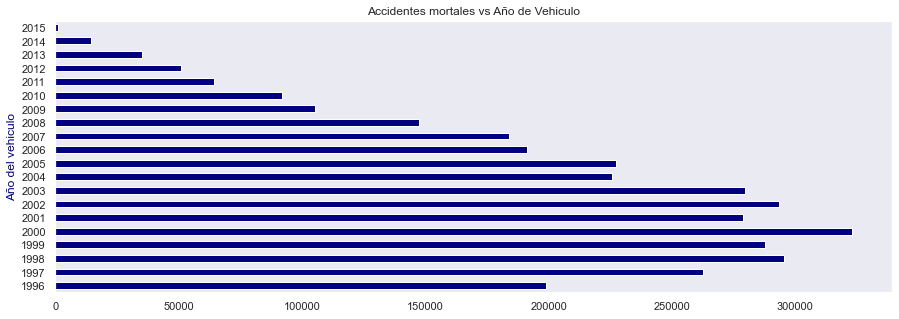

In [20]:
data_9 = df_acc_p[['v_year',"c_year", "c_sev"]].replace('[^0-9]+',np.nan,regex=True)
data_9 = data_9.groupby(["c_year", "v_year"]).size().unstack()
data_9.fillna(0, inplace=True)
data_9 = data_9.astype(int)
data_9 = data_9.iloc[:,-20:].sum()

'''Dibujamos el gráfico señalado: '''
fig,ax1 = plt.subplots()
ax1.tick_params(grid_alpha=0)
data_9.plot(kind="barh", color='navy', figsize=(15,5),
         title='Accidentes mortales vs Año de Vehiculo')
ax1.set_ylabel('Año del vehiculo', color="navy")

Puede ser razonable que es una escala normal, los vehiculos que mas accidentes tengas sean los comprendidos entre 1998 y 2001, ya que en este dataset recorren mas tiempo.

#### Año de coche vs mortalidad. 

Text(0, 0.5, 'Año del vehiculo')

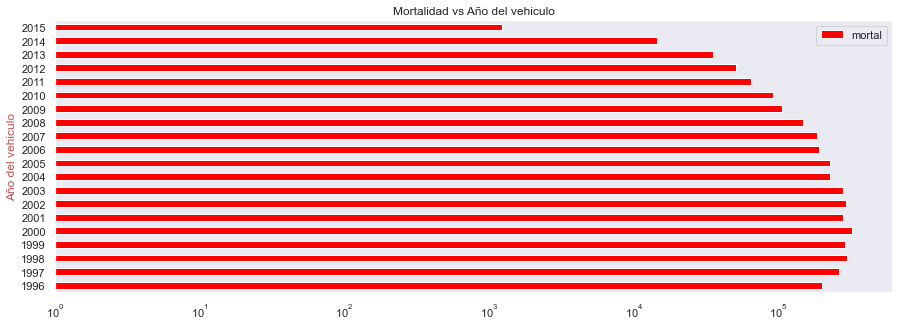

In [21]:
data_10 = df_acc_p[['v_year',"mortal"]].replace('[^0-9]+',np.nan,regex=True)
data_10 = data_10.groupby(["v_year"]).count()[-20:]

'''Dibujamos el gráfico señalado: '''
fig,ax1 = plt.subplots()
ax1.tick_params(grid_alpha=0)
data_10.plot(kind="barh", log=True, color="red", figsize=(15,5),
         title='Mortalidad vs Año del vehiculo', ax=ax1)
ax1.set_ylabel('Año del vehiculo', color="r")



Para que el grafico tenga datos comparativos, lo hemos hecho en escala logaritmica. Podemos observar como los vehiculos entre 1997 y 2003 tienen mas accidentes mortales, puede ser que las medidas de seguridad de dichos coches no se adecuen de manera exacta a las prestaciones automovilisticas.

#### 7.0. ¿Qué tipos de conductores son mas propensos a tener accidentes?

#### 7.1. Edad vs Accidentes de tráfico. 

Primero analizamos la edad vs los accidentes: 

Para tratar los datos, eliminamos los NN, convertimos los datos a numerico y posteriormente los agrupamos por edades comprendidas de 10 en 10 hasta los 100 años. 

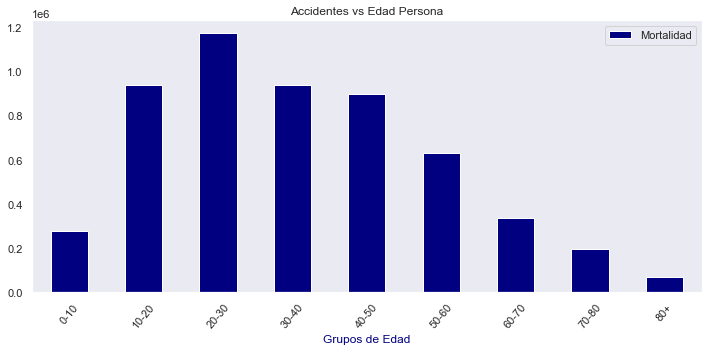

In [22]:
data_11 = df_acc_p[['p_age',"c_sev"]].replace('[^0-9]+',np.nan,regex=True)
corte = list(range(0,100,10))
data_11.dropna(axis=0,subset=['p_age','c_sev'],inplace=True)
data_11 = data_11.astype(int)
data_11["p_age"] = pd.cut(data_11["p_age"],corte)
data_11 = data_11.set_index("p_age").groupby("p_age").count().set_axis(["0-10", "10-20", "20-30",
                                                                        "30-40", "40-50", "50-60", 
                                                                        "60-70", "70-80", "80+"])


'''Dibujamos el grafico'''

fig,ax1 = plt.subplots()
ax1.tick_params(grid_alpha=0)

data_11.plot(kind="bar", rot=50, color="navy", figsize=(12,5),
         title='Accidentes vs Edad Persona', ax=ax1)
ax1.set_xlabel('Grupos de Edad', color="navy")
ax1.legend(["Mortalidad"])


Podemos ver como claramente el grupo de edad que mas accidentes de trafico sufre es la de 20-30 años. Ahora comprobaremos la edad con la hora del dia especifica.

#### 7.2.Edad vs hora del dia.  

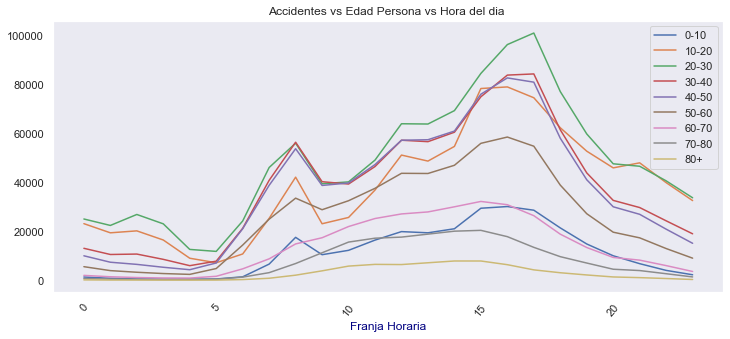

In [23]:
corte_edad= list(range(0,100,10))
data_12 = df_acc_p[['p_age',"c_hour"]].replace('[^0-9]+',np.nan,regex=True)
data_12.dropna(axis=0,subset=['p_age',"c_hour"],inplace=True)
data_12 = data_12.astype(int)
data_12["p_age"] = pd.cut(data_12["p_age"],corte_edad)
data_12 = data_12.groupby(["c_hour", "p_age"]).size().unstack()

'''Dibujamos el grafico'''

fig,ax1 = plt.subplots()
ax1.tick_params(grid_alpha=0)
data_12.plot(rot=50,figsize=(12,5),title='Accidentes vs Edad Persona vs Hora del dia ', ax=ax1)
ax1.set_xlabel('Franja Horaria', color="navy")
ax1.legend(["0-10", "10-20", "20-30",
            "30-40", "40-50", "50-60", 
            "60-70", "70-80", "80+"])

Podemos ver como el grupo de 20 a 30 años encabeza el grupo en la mayoria de las franjas horarias. Sin embargo, destacamos diferentes cosas de este dataset. 

1. El puto de mas accidentes es entre las 15 y las 20 horas.
2. De madrugada el grupo que mas accidentes de trafico tiene es el comprendido entre 30 y 40 años. 
3. Entre las 21 y las 22 de la noche el grupo que mas sufre accidentes de tráfico es aquel compuesto por la edad entre 10 y 20 años. 

#### 7.3. Edad vs Semana

<AxesSubplot:title={'center':'Accidentes vs Edad Persona vs Dia de la semana'}>

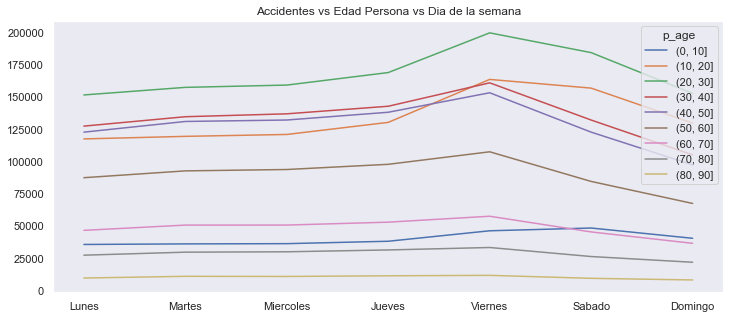

In [24]:
corte_edad= list(range(0,100,10))
data_13 = df_acc_p[['p_age',"c_wday"]].replace('[^0-9]+',np.nan,regex=True)
data_13.dropna(axis=0,subset=['p_age',"c_wday"],inplace=True)
data_13 = data_13.astype(int)
data_13["p_age"] = pd.cut(data_13["p_age"],corte_edad)
data_13 = data_13.groupby(["c_wday", "p_age"]).size().unstack().set_axis(["Lunes", "Martes", "Miercoles",
                                                                          "Jueves", "Viernes", "Sabado",
                                                                          "Domingo"])

'''Dibujamos el grafico'''

fig,ax1 = plt.subplots()
ax1.tick_params(grid_alpha=0)
data_13.plot(figsize=(12,5),title='Accidentes vs Edad Persona vs Dia de la semana', ax=ax1)


En este gráfico no podemos ver nada relevante por grupo de edad. Solo podemos destacar el grupo de 10 a 20 años, sobresale el fin e semana con respecto a otros grupos.  

#### 7.4. SEXO vs ACCIDENTES (por hora)

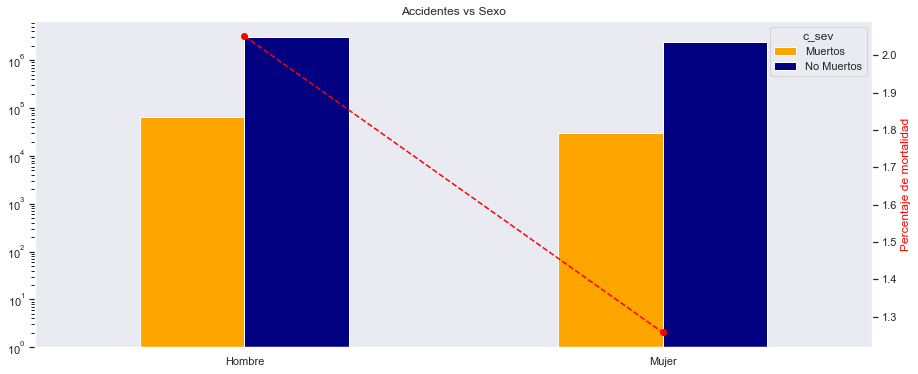

In [25]:
data_16 = df_acc_p[["p_sex", "c_sev"]]
data_16["p_sex"].replace({'M':0,'F':1},inplace=True)
data_16 = data_16.replace('[^0-9]+',np.nan,regex=True)
data_16.dropna(axis=0,subset=["c_sev",'p_sex'],inplace=True)
data_16 = data_16.groupby(["p_sex","c_sev"]).size().unstack().set_axis(["Hombre","Mujer"])
data_16 = data_16.rename(columns={1: 'Muertos', 2: 'No Muertos'})

'''Dibujamos el grafico'''

plot_analisis(data_16, "Accidentes vs Sexo", 0)

Vemos como en el gráfico los hombres siempre estan por encima de las mujeres. En cuanto a la tasa de mortalidad tambien es bastante mayor en hombres que en mujeres.

#### 8. Posición dentro del habitáculo del vehiculo vs Mortalidad.

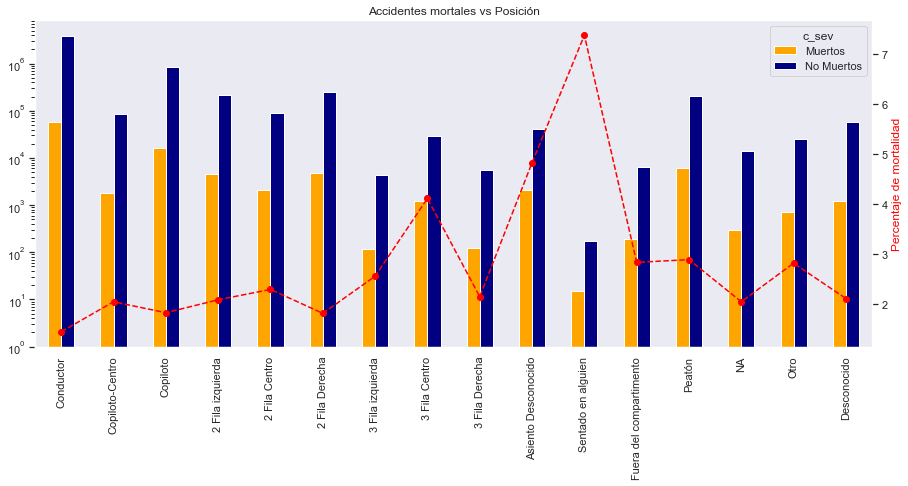

In [26]:
data_17 = df_acc_p[["c_sev", "p_psn"]].set_index("p_psn")
data_17 = data_17.groupby(["p_psn", "c_sev"]).size().unstack()
data_17 = data_17.set_axis(["Conductor","Copiloto-Centro", "Copiloto",
                            "2 Fila izquierda", "2 Fila Centro", "2 Fila Derecha", 
                            "3 Fila izquierda", "3 Fila Centro", "3 Fila Derecha",
                            "Asiento Desconocido", "Sentado en alguien", "Fuera del compartimento",
                           "Peatón", "NA", "Otro", "Desconocido" ], axis="index")
data_17 = data_17.rename(columns={1: 'Muertos', 2: 'No Muertos'})

'''Dibujamos el grafico'''

plot_analisis(data_17, "Accidentes mortales vs Posición", 90)

#### 9. Tipo de accidente y mortalidad.

<AxesSubplot:title={'center':'Evolución tipo de accidente por Año'}, xlabel='c_year'>

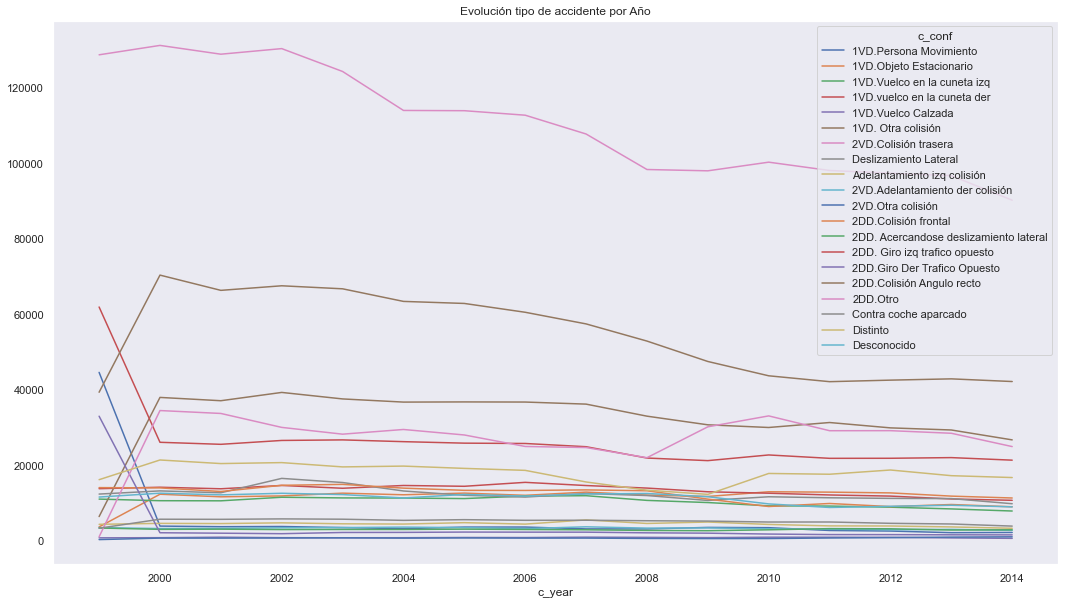

In [27]:
data_18 = df_acc_p[["c_year", "c_conf"]]
data_18 = data_18.groupby(["c_year", "c_conf"]).size().unstack()
data_18 = data_18.rename(columns={"01":"1VD.Persona Movimiento", "02": "1VD.Objeto Estacionario", "03":"1VD.Vuelco en la cuneta izq",
                                 "04": "1VD.vuelco en la cuneta der", "05": "1VD.Vuelco Calzada", "06": "1VD. Otra colisión",
                                 "21": "2VD.Colisión trasera", "22": "Deslizamiento Lateral", "23": "Adelantamiento izq colisión",
                                 "24": "2VD.Adelantamiento der colisión", "25": "2VD.Otra colisión", "31": "2DD.Colisión frontal",
                                 "32": "2DD. Acercandose deslizamiento lateral", "33": "2DD. Giro izq trafico opuesto",
                                 "34": "2DD.Giro Der Trafico Opuesto", "35": "2DD.Colisión Angulo recto", "36": "2DD.Otro",
                                 "41": "Contra coche aparcado","QQ": "Distinto", "UU": "Desconocido"})

'''Dibujamos el grafico'''

fig,ax1 = plt.subplots()
ax1.tick_params(grid_alpha=0)
data_18.plot(figsize=(18,10),title='Evolución tipo de accidente por Año', ax=ax1)

Podemos ver como el impacto mas común es la colisión por acercamiento. Esto nos revela un problema en el trafico de Canada, no se respecta la distancia de seguridad entre coche y coche. La siguiente colisión mas usual es la de ángulo recto. Una colisión frontal que aventuramos producirá mas muertos que la colisión por alcance. Lo estudiamos ahora: 

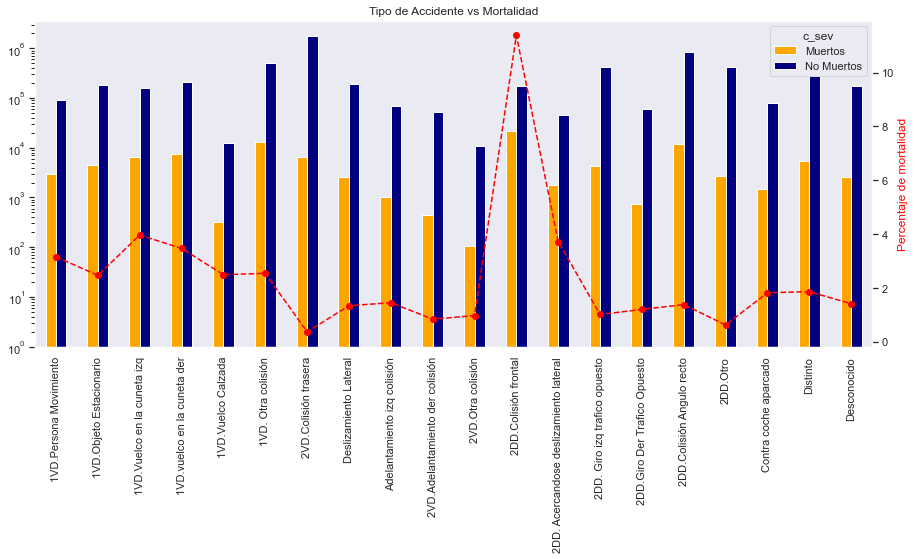

In [28]:
data_19 = df_acc_p[["c_conf", "c_sev"]].set_index("c_conf")
data_19 = data_19.groupby(["c_conf", "c_sev"]).size().unstack()
data_19 = data_19.set_axis(["1VD.Persona Movimiento", "1VD.Objeto Estacionario", "1VD.Vuelco en la cuneta izq",
                                 "1VD.vuelco en la cuneta der", "1VD.Vuelco Calzada", "1VD. Otra colisión",
                                 "2VD.Colisión trasera", "Deslizamiento Lateral", "Adelantamiento izq colisión",
                                 "2VD.Adelantamiento der colisión", "2VD.Otra colisión", "2DD.Colisión frontal",
                                 "2DD. Acercandose deslizamiento lateral", "2DD. Giro izq trafico opuesto",
                                 "2DD.Giro Der Trafico Opuesto", "2DD.Colisión Angulo recto", "2DD.Otro",
                                 "Contra coche aparcado","Distinto", "Desconocido"], axis="index")

data_19 = data_19.rename(columns={1: 'Muertos', 2: 'No Muertos'})

'''Dibujamos el grafico'''

plot_analisis(data_19, "Tipo de Accidente vs Mortalidad", 90)

Este gráfico nos refleja una evolución de nuestra conclusión anterior. Los dos accidentes que mas destacan son la colision trasera y en angulo recto,sin embargo, queremos destacar que el procentaje de mortalidad de la colisión trasera o por alcance es muy inferior a la del resto de colisiones. En este sentido, la colisión mas mortal, es la colisión frontal. De cara a nuestro modelo, el tipo de colisión será muy importante para determinar si hay fallecidos o no. Especialmente sera significativa la colisión frontal. 

#### 11. Mecanismo de Seguridad vs Mortalidad. 

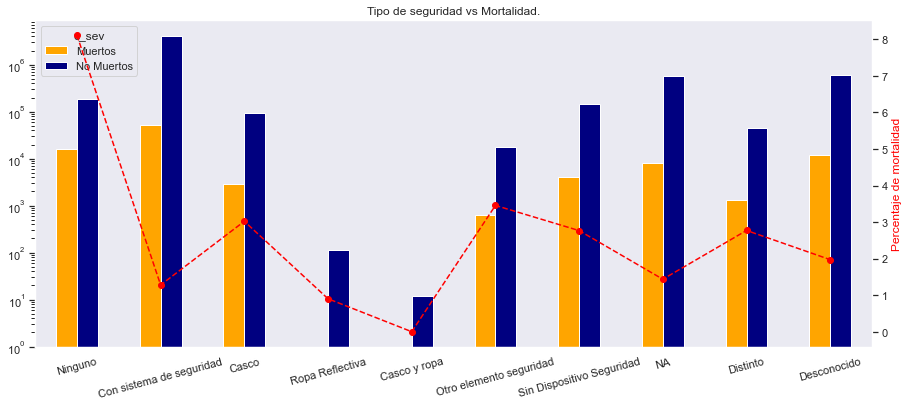

In [29]:
data_20 = df_acc_p[["p_safe", "c_sev"]].set_index("p_safe")
data_20 = data_20.groupby(["p_safe", "c_sev"]).size().unstack().set_axis(["Ninguno", "Con sistema de seguridad",
                                                                           "Casco", "Ropa Reflectiva","Casco y ropa",
                                                                           "Otro elemento seguridad", "Sin Dispositivo Seguridad",
                                                                          "NA", "Distinto", "Desconocido"])

data_20.fillna(0, inplace=True)
data_20 = data_20.rename(columns={1: 'Muertos', 2: 'No Muertos'})


'''Dibujamos el grafico'''

plot_analisis(data_20, "Tipo de seguridad vs Mortalidad.", 15)

Vemos que la mortalidad se dispara cuando no hay dispositivo de seguridad. De cara a nuestro modelo y al tratamiento de datos, agruparemos estos datos en 2. Utilización de dispositivo de seguridad, no utilización de dispositivo de seguridad, ya que simplifica mas los datos y la conclusión es la misma. 

---